This is an implementation of Logistic Regression to see who has diabetes. The test set achieved an accuracy of 73.4375%

**Importing Libaries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling as pp 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes2.csv to diabetes2.csv


**Data Preprocessing**

In [6]:
df=pd.read_csv('diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#Counting Zero Values for each column:Glucose,BloodPressure,SkinThickness,Insulin,BMI
zero_attributes=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
def zero_values(df,zero_attributes):
    for i in zero_attributes:
        df_count=df.loc[df[i] == 0]
        x=(df_count[i].count()/df[i].count())*100
        x=round(x,2)
        print(f'The Number of zero values in column {i} is {x}')
zero_values(df,zero_attributes)

The Number of zero values in column Glucose is 0.65
The Number of zero values in column BloodPressure is 4.56
The Number of zero values in column SkinThickness is 29.56
The Number of zero values in column Insulin is 48.7
The Number of zero values in column BMI is 1.43


In [12]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [13]:
100 * df.isna().sum() / df.shape[0]

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [14]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
#df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
# df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [15]:
df.drop(['SkinThickness', 'Insulin'], axis = 1, inplace = True)

In [16]:
df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
de=df.copy()

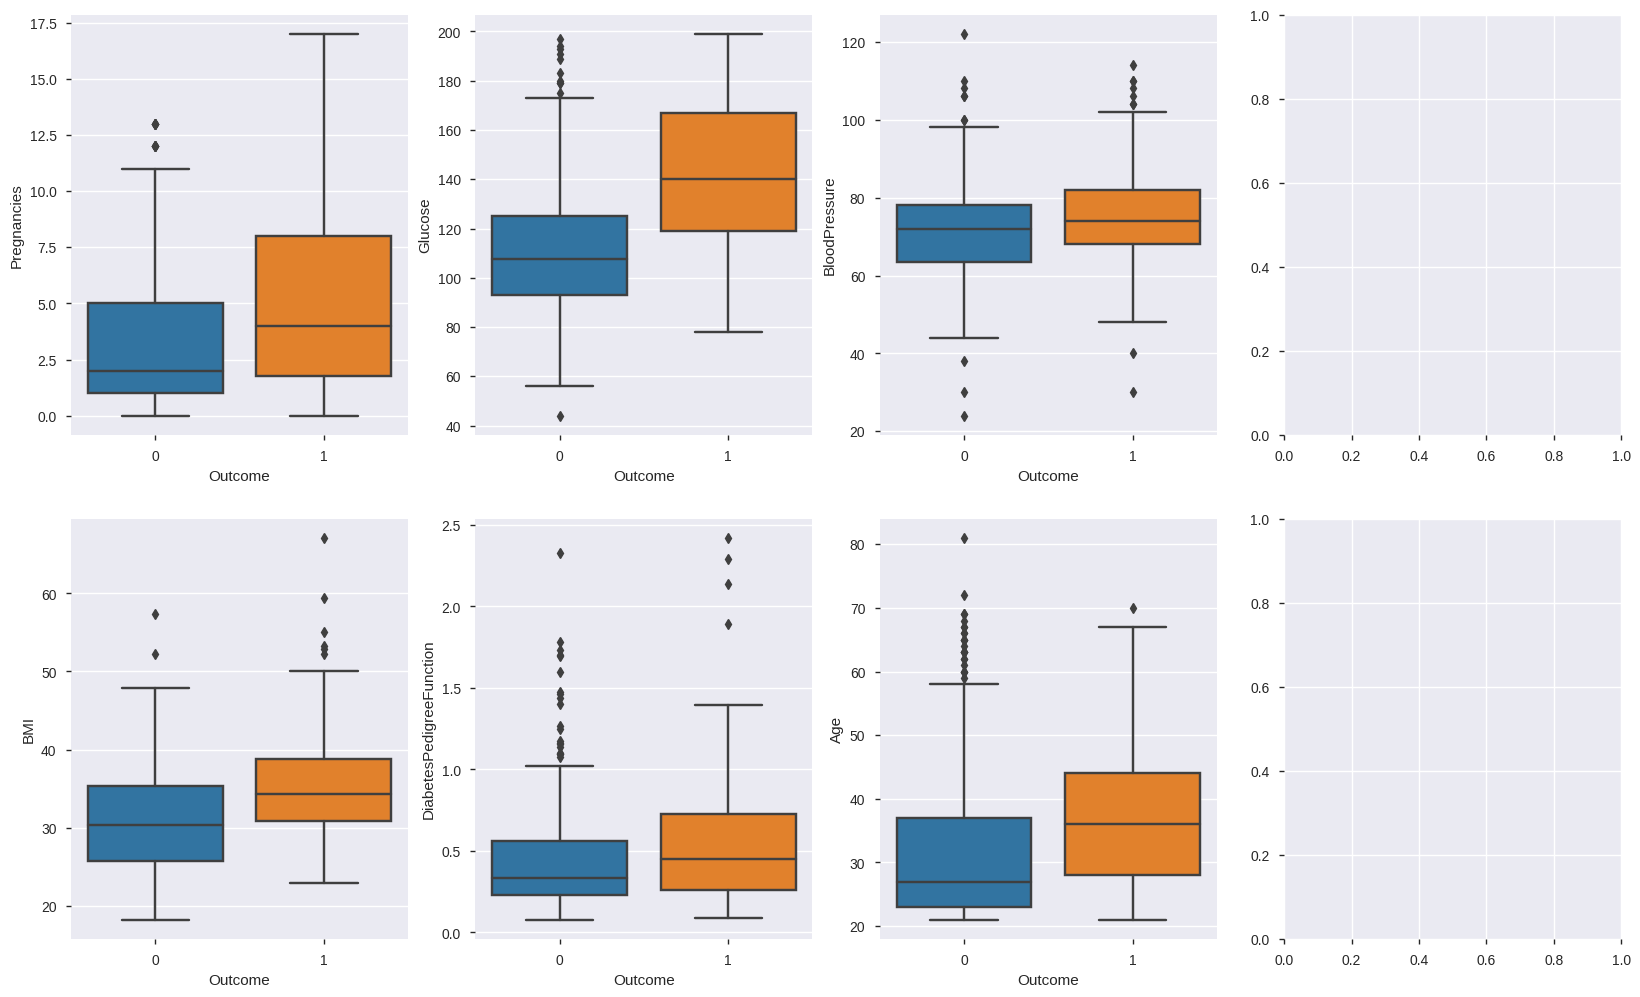

In [20]:
c=[0,1,2]
r=[0,1]
cols_index=0
cols=df.columns[:-1]
fig,axs = plt.subplots(2, 4,figsize=(20,12))
for i in r:
    for j in c:              
        box_plot = sns.boxplot(x="Outcome",y=cols[cols_index],data=df,ax=axs[i,j])
        medians = df.groupby(["Outcome"])[cols[cols_index]].median()
        vertical_offset = df[cols[cols_index]].median() * 0.05 
        cols_index+=1

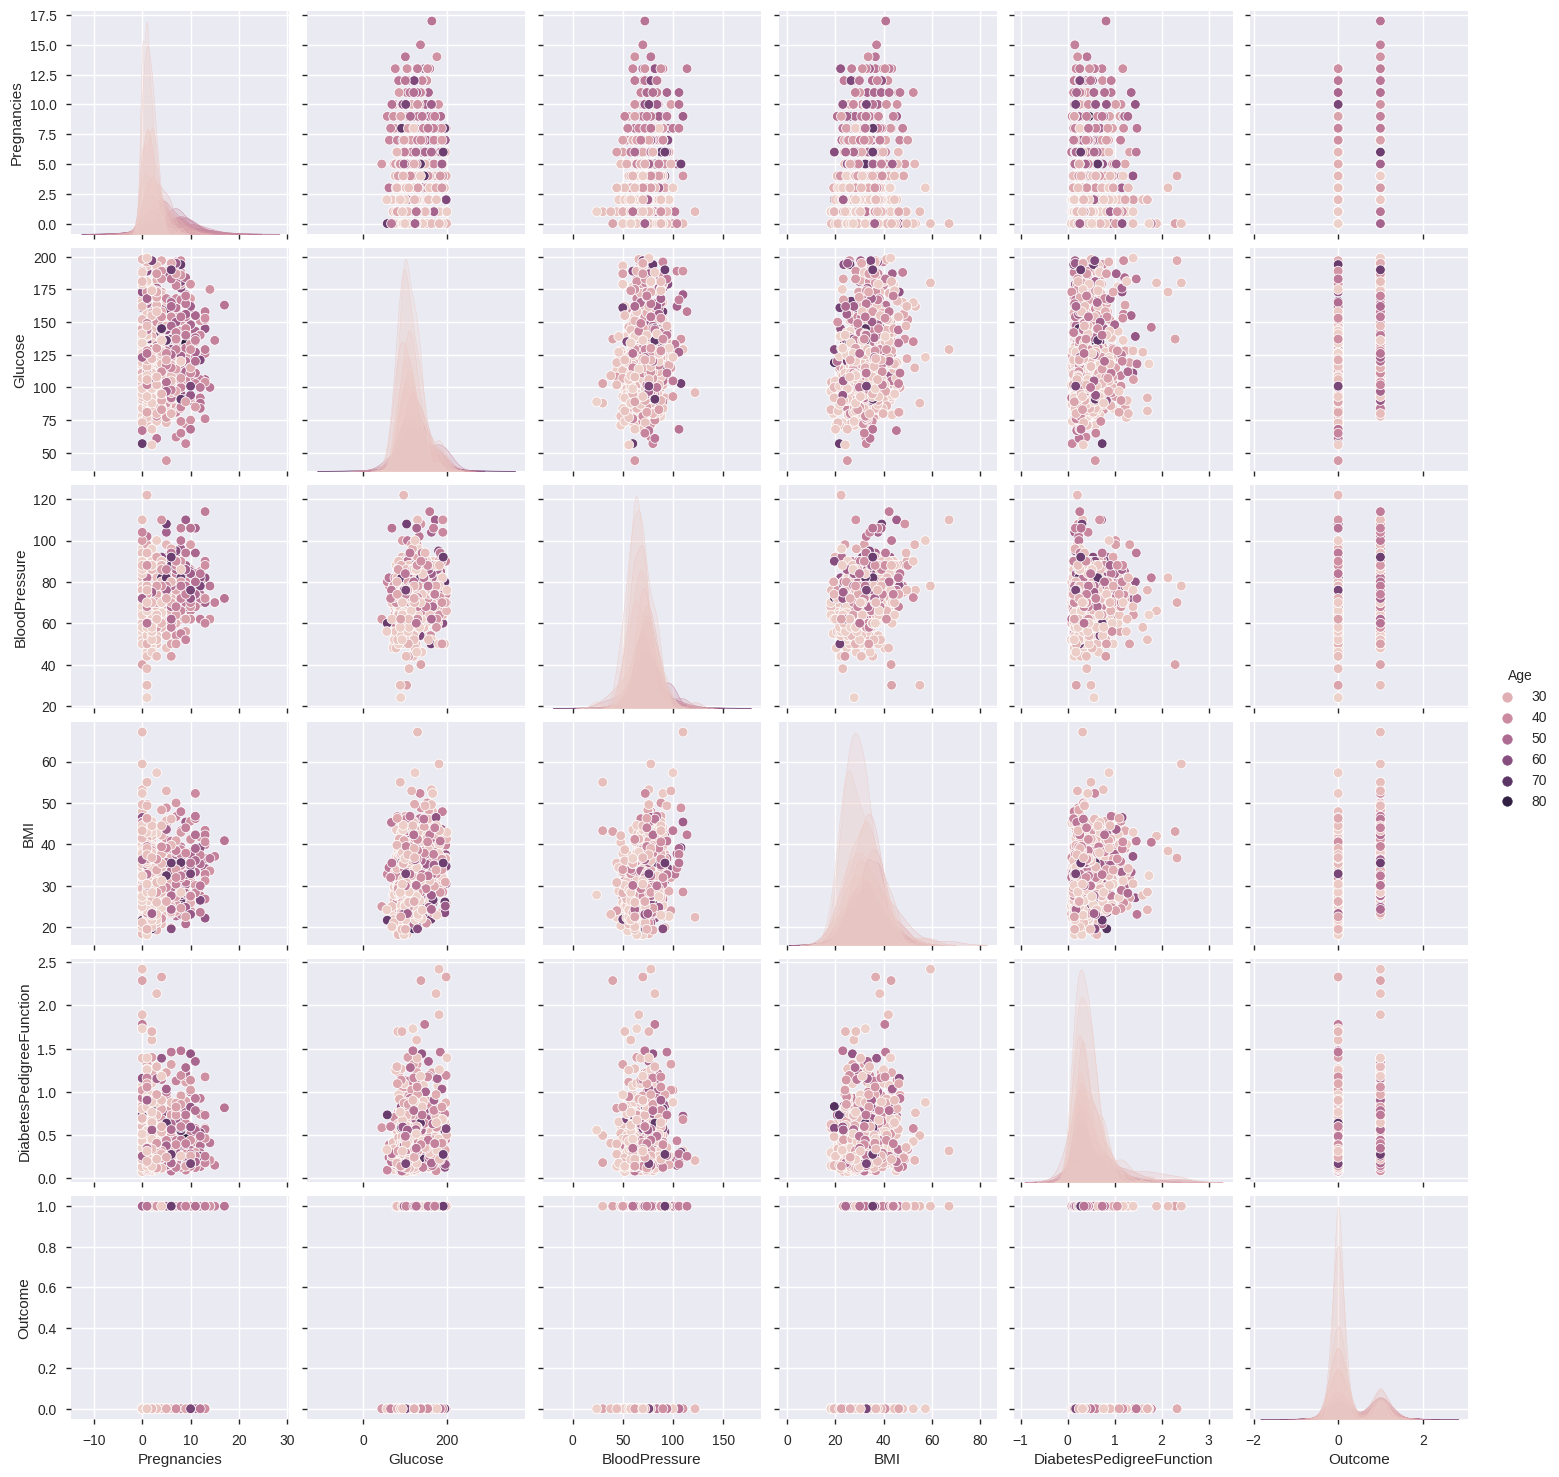

In [22]:
sns.pairplot(df, hue='Age')

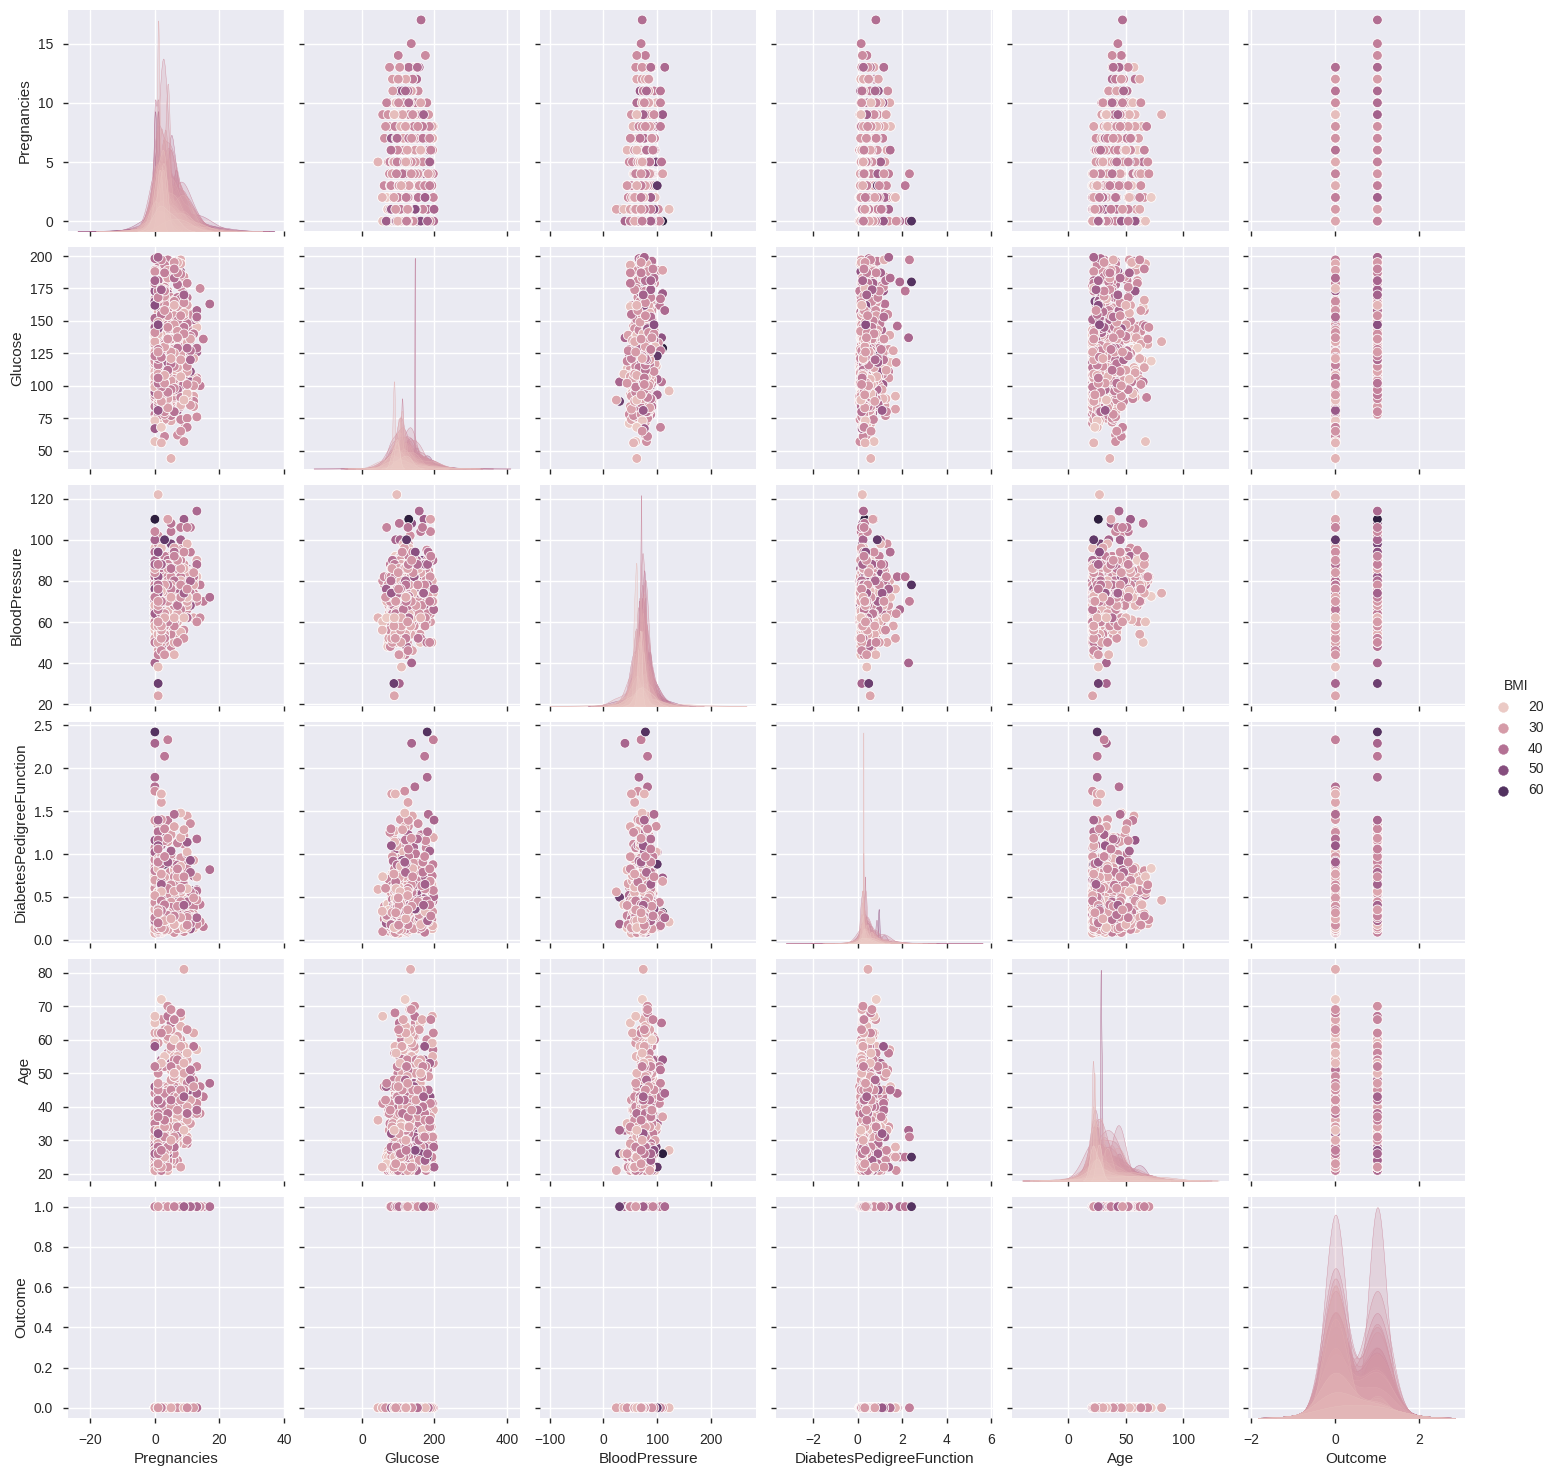

In [23]:
sns.pairplot(df, hue='BMI')

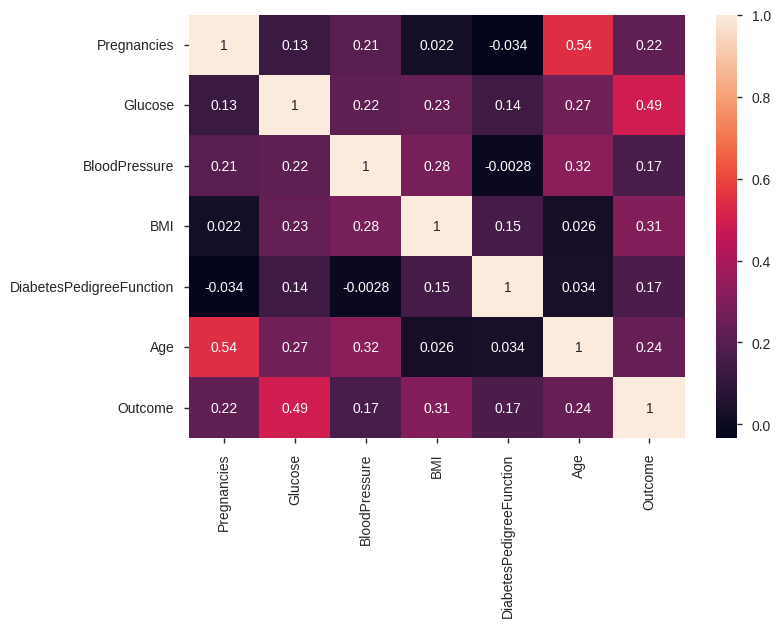

In [24]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [25]:
X = de.drop("Outcome",axis =1)
y = de["Outcome"]

datalist = df.columns.values.tolist()
datalist.remove("Outcome")

**Building the Model**

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state=120)

In [27]:
scaler = MinMaxScaler()
#continuous
data_scaled =['Glucose', 'BloodPressure', 'BMI',
        'DiabetesPedigreeFunction', 'Age']

X_train[data_scaled] = scaler.fit_transform(X_train[data_scaled])

In [28]:
model= LogisticRegression()

model.fit(X_train, y_train)
trainscore =  model.score(X_train,y_train)

In [29]:
#continuous
X_test[data_scaled] = scaler.transform(X_test[data_scaled]) 

testscore =  model.score(X_test,y_test)  

In [32]:
print("test score: {} \ntrain score: {}".format(testscore*100,trainscore*100),'\n')

y_pred =  model.predict(X_test)

test score: 73.4375 
train score: 78.47222222222221 



In [33]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))

Confusion Matrix : 
 [[108  15]
 [ 36  33]]


In [35]:
print(' f1 score: ',f1_score(y_test, y_pred)*100,'\n')
print(' Accuracy: ',accuracy_score(y_test, y_pred)*100,'\n')
print(' precision score: ',precision_score(y_test, y_pred)*100,'\n')
print(' recall score: ',recall_score(y_test, y_pred)*100,'\n')

 f1 score:  56.41025641025642 

 Accuracy:  73.4375 

 precision score:  68.75 

 recall score:  47.82608695652174 

